Created: Monday 29Aug2022

Author: Lynn Menchaca

The purpose of this document is to analyze all the collected NFL data.

Resources:

1)
Author: Alex -> 
Article: Pie Charts with Labels in Matplotlib -> 
Website:
https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.style as style
from matplotlib.patches import ConnectionPatch
from matplotlib.pyplot import figure
import statistics as stat
import scipy.stats as scistats
from scipy.stats import norm
from collections import Counter

In [2]:
#parse_dates=True
data_file_path = '/Users/lynnpowell/Documents/DS_Projects/NFL_Analysis/Data_Sets/'
nfl = pd.read_csv(data_file_path+'nfl_cleaned_data.csv', parse_dates=['DateTime'])

In [3]:
nfl.head()

,Season,Week,DateTime,H_WinTeam,HomeTeam,HomePts,HomeYds,HomeTO,AwayTeam,AwayPts,...,SACK_Away,PEN_Away,RAW_Away,QBName_Away,QB_Pre_RK_Away,div_game,out_conf,Rest_Away,Rest_Home,win_rest_delta
0,2021,ConfChamp,2022-01-30 18:30:00,1.0,Rams,20.0,396.0,1.0,49ers,17.0,...,-11.7,1.9,52.0,Jimmy Garoppolo,NaN,1,0,7 days 22:15:00,7 days 03:30:00,-1 days +05:15:00
1,2021,ConfChamp,2022-01-30 15:00:00,0.0,Chiefs,24.0,375.0,2.0,Bengals,27.0,...,-22.9,1.7,57.7,Joe Burrow,24.0,0,0,7 days 22:30:00,6 days 20:30:00,1 days 02:00:00
2,2021,Division,2022-01-23 18:30:00,1.0,Chiefs,42.0,552.0,0.0,Bills,36.0,...,-10.5,0.3,61.8,Josh Allen,3.0,0,0,7 days 22:15:00,6 days 22:15:00,-1 days +00:00:00
3,2021,Division,2022-01-23 15:00:00,0.0,Buccaneers,27.0,359.0,2.0,Rams,30.0,...,-13.1,1.7,64.2,Matthew Stafford,15.0,0,0,5 days 18:45:00,7 days 02:00:00,-2 days +16:45:00
4,2021,Division,2022-01-22 20:15:00,0.0,Packers,10.0,263.0,1.0,49ers,13.0,...,-11.7,1.9,52.0,Jimmy Garoppolo,NaN,0,0,6 days 03:35:00,13 days 07:15:00,-8 days +20:20:00


In [4]:
nfl.columns

Index(['Season', 'Week', 'DateTime', 'H_WinTeam', 'HomeTeam', 'HomePts',
       'HomeYds', 'HomeTO', 'AwayTeam', 'AwayPts', 'AwayYds', 'AwayTO',
       'Capacity', 'Opened', 'Turf', 'Cost', 'Stadium_Roof', 'Fan_Repu',
       'Weather', 'Location', 'Div_Home', 'Conf_Home', 'Rank_Off_Home',
       'Yards/G_Off_Home', 'Rush/G_Off_Home', 'Rush/P_Off_Home',
       'Pass/G_Off_Home', 'QBR_Off_Home', 'Sacks_Off_Home', '3rd%_Off_Home',
       'Poss/G_Off_Home', 'Pts/G_Off_Home', 'Off_Pre_RK_Home', 'Rank_Def_Home',
       'Yards/G_Def_Home', 'Rush/G_Def_Home', 'Rush/P_Def_Home',
       'Pass/G_Def_Home', 'QBR_Def_Home', 'Sacks_Def_Home', '3rd%_Def_Home',
       'Poss/G_Def_Home', 'Pts/G_Def_Home', 'Def_Pre_RK_Home', 'RK_Home',
       'QBR_Home', 'PAA_Home', 'Plays_Home', 'EPA_Home', 'PASS_Home',
       'RUN_Home', 'SACK_Home', 'PEN_Home', 'RAW_Home', 'QBName_Home',
       'QB_Pre_RK_Home', 'Div_Away', 'Conf_Away', 'Rank_Off_Away',
       'Yards/G_Off_Away', 'Rush/G_Off_Away', 'Rush/P_Off_Away',

In [5]:
# Drop all of the null valus for H_WinTeam, this is the column we are trying to predict later
print("Tie games or other: " + str(nfl['H_WinTeam'].isnull().sum()))
nfl = nfl.dropna(subset=['H_WinTeam'], axis=0)
print("Missing winning games: " + str(nfl['H_WinTeam'].isnull().sum()))

Tie games or other: 10
Missing winning games: 0


In [6]:
nfl.shape

(3999, 97)

Home Games Won: 2247
Away Games Won: 1752


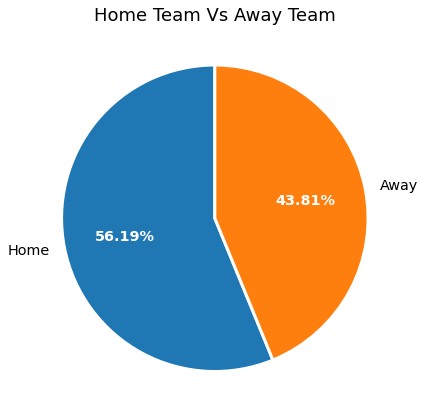

In [7]:
#Using resource from Alex -> Pie Charts with Labels in Matplotlib
#Pie chart of Home Team winning vs Away
print('Home Games Won: ' + str(nfl['H_WinTeam'].value_counts()[1]))
print('Away Games Won: ' + str(nfl['H_WinTeam'].value_counts()[0]))
labels = ['Home', 'Away']
values = [nfl['H_WinTeam'].value_counts()[1], nfl['H_WinTeam'].value_counts()[0]]

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    x=values, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Home Team Vs Away Team', fontsize=18)
plt.tight_layout()
#plt.pie(x=values, labels=labels, autopct='%.2f%%', textprops={'size': 'x-large'})
#plt.setp(pct, color='white', fontweight='bold')
#plt.show()

In [8]:
#Only using the games the conferences don't match for home and away
out_conf_headers = ['Season','H_WinTeam','Conf_Home','Conf_Away', 'Div_Home', 'Div_Away','HomeTeam','AwayTeam']
out_conf = nfl[out_conf_headers][nfl['Conf_Home']!=nfl['Conf_Away']]
print(out_conf.head())

#Make a table of just the win, divisions and conferences - Away
out_conf_away = out_conf[['Season','H_WinTeam','Conf_Away', 'Div_Away','AwayTeam'
                 ]][out_conf['H_WinTeam']==0]
out_conf_away = out_conf_away.rename({'H_WinTeam':'H_Win', 'Conf_Away':'Conf', 'Div_Away':'Div', 'AwayTeam':'Team'},axis=1)
print(out_conf_away.head())

#Make a table of just the win, divisions and conferences - Home
out_conf_home = out_conf[['Season','H_WinTeam','Conf_Home', 'Div_Home', 'HomeTeam'
                 ]][out_conf['H_WinTeam']==1]
out_conf_home = out_conf_home.rename({'H_WinTeam':'H_Win', 'Conf_Home':'Conf', 'Div_Home':'Div','HomeTeam':'Team'},axis=1)
print(out_conf_home.head())

#combinning both files to make the data easier to plot and analyze
out_conf_stats = pd.concat([out_conf_home, out_conf_away], axis=0)
#The number of rows matches the full data frame 'nfl'
print(out_conf_stats.shape)
#print(out_conf_stat.head())


    Season  H_WinTeam Conf_Home Conf_Away   Div_Home   Div_Away HomeTeam  \
30    2021        0.0       AFC       NFC  AFC North   NFC West   Ravens   
32    2021        1.0       NFC       AFC   NFC West  AFC South    49ers   
34    2021        1.0       AFC       NFC   AFC East  NFC South    Bills   
43    2021        0.0       AFC       NFC   AFC East  NFC South     Jets   
44    2021        0.0       NFC       AFC  NFC South   AFC East   Saints   

      AwayTeam  
30        Rams  
32      Texans  
34     Falcons  
43  Buccaneers  
44    Dolphins  
    Season  H_Win Conf        Div        Team
30    2021    0.0  NFC   NFC West        Rams
43    2021    0.0  NFC  NFC South  Buccaneers
44    2021    0.0  AFC   AFC East    Dolphins
57    2021    0.0  AFC  AFC South       Colts
71    2021    0.0  NFC  NFC North     Packers
    Season  H_Win Conf        Div     Team
32    2021    1.0  NFC   NFC West    49ers
34    2021    1.0  AFC   AFC East    Bills
58    2021    1.0  NFC  NFC North  P

In [9]:
#Examing the data for the out of conference games

#out_conf_stats['Conf'].groupby(out_conf['DateTime'].dt.year).value_counts()
out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().unstack()

Conf,AFC,NFC
Season,,
2007,32,32
2008,34,29
2009,37,27
2010,34,30
2011,31,33
2012,25,39
2013,30,34
2014,33,30
2015,29,35


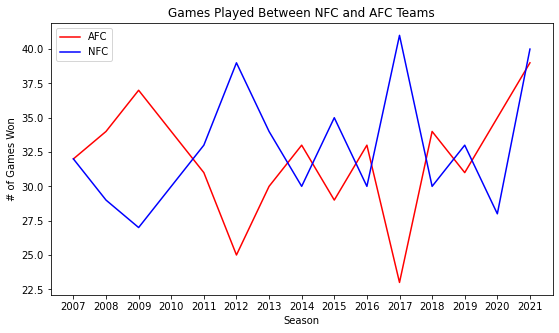

In [10]:
#Ploting the data for the out of conference games

#out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().plot.bar()
fig = plt.subplots(1, 1, figsize=(9,5))
plt.plot(out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().unstack()['AFC'], color='red', label='AFC')
plt.plot(out_conf_stats['Conf'].groupby(out_conf_stats['Season']).value_counts().unstack()['NFC'], color='blue', label='NFC')
plt.legend()
plt.title('Games Played Between NFC and AFC Teams')
plt.ylabel('# of Games Won')
plt.xlabel('Season')
plt.xticks(np.arange(min(out_conf_stats['Season']), max(out_conf_stats['Season'])+1))
#width = 10
#height = 6
#fig.set_size_inches(width, height)
#figure(figsize=(10, 6), dpi=160)
plt.show()

NFC Games Won: 491
AFC Games Won: 480


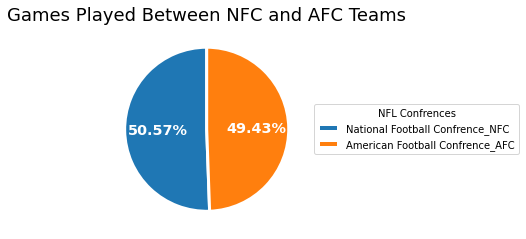

In [11]:
#Total comparison of games the NFC and AFC played
#Only using the games the conferences don't match for home and away

#afc_sum = out_conf['Conf_Home'][out_conf['H_WinTeam']==1].value_counts()['AFC'] + out_conf['Conf_Away'][out_conf['H_WinTeam']==0].value_counts()['AFC']
#nfc_sum = out_conf['Conf_Home'][out_conf['H_WinTeam']==1].value_counts()['NFC'] + out_conf['Conf_Away'][out_conf['H_WinTeam']==0].value_counts()['NFC']

afc_sum = out_conf_stats['Conf'].value_counts()['AFC']
nfc_sum = out_conf_stats['Conf'].value_counts()['NFC']

print('NFC Games Won: ' + str(nfc_sum))
print('AFC Games Won: ' + str(afc_sum))

#Pie Chart
labels = ['National Football Confrence_NFC', 'American Football Confrence_AFC']
values = [nfc_sum, afc_sum]

fig, ax = plt.subplots(figsize=(6, 6))
patches, texts, pcts = ax.pie(
    x=values, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Games Played Between NFC and AFC Teams', fontsize=18)
ax.legend(patches, labels,
          title="NFL Confrences",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()

In [12]:
#Looking at division winners for games played outside of Conference
print(out_conf_stats['Div'].value_counts())
print(out_conf_stats['Team'][out_conf_stats['Div']=='AFC North'].value_counts())
print(out_conf_stats['Team'][out_conf_stats['Div']=='AFC South'].value_counts())

AFC North    126
NFC West     125
AFC East     125
NFC North    125
NFC South    124
AFC West     119
NFC East     117
AFC South    110
Name: Div, dtype: int64
Steeler    39
Ravens     39
Bengals    27
Browns     21
Name: Team, dtype: int64
Titans     37
Colts      36
Texans     25
Jaguars    12
Name: Team, dtype: int64


In [13]:
#Looking at the top 10 teams for winning games played outside of conference
#out_conf_stats['Team'].value_counts().head(10)
out_conf_stats['Team'].groupby(out_conf_stats['Conf']).value_counts().sort_values(ascending=False).head(13)

Conf  Team     
AFC   Patriots     44
NFC   Packers      40
AFC   Steeler      39
      Ravens       39
      Chiefs       37
NFC   Saints       37
AFC   Titans       37
      Colts        36
      Broncos      34
NFC   Seahawks     34
      Cardinals    34
      Eagles       34
      Bears        33
Name: Team, dtype: int64


***

Based off the data above, it looks like the NFC is the conference with the most wins. Looking at the rest of the data I am a little suprised by this becusae the AFC has the division (AFC North) with the most out of conference wins. The AFC also has 7 teams in the top 9.

It looks like what hurst the AFC conference is the AFC South division. The total difference of wins between the AFC and NFC is 11 points and AFC South is 7 points of that point difference. The NFC also has the 3 divisions in the top 5, helping NFC catch up to AFC.

It is interesting to see every other year the NFC and AFC alterate who has the most total wins for that season. Next is analyzing the divisions, the goal is to see if this is from drafting new players (the teams on the bottom help bring up the over all performance) or if this is from the middle teams have a good team and a densent draft position or is this from the top teams continuing to improve?

***


In [14]:
#Only using the games played in the same conference and outside of the division
out_div_headers = ['Season','H_WinTeam','Conf_Home','Conf_Away', 'Div_Home', 'Div_Away','HomeTeam','AwayTeam']
out_div = nfl[out_div_headers][(nfl['Conf_Home']==nfl['Conf_Away']) & (nfl['Div_Home'] != nfl['Div_Away'])]
print(out_div.head(10))

#Make a table of just the win, divisions and conferences - Away
out_div_away = out_div[['Season','H_WinTeam','Conf_Away', 'Div_Away','AwayTeam'
                 ]][out_div['H_WinTeam']==0]
out_div_away = out_div_away.rename({'H_WinTeam':'H_Win', 'Conf_Away':'Conf', 'Div_Away':'Div', 'AwayTeam':'Team'},axis=1)
print(out_div_away.head())

#Make a table of just the win, divisions and conferences - Home
out_div_home = out_div[['Season','H_WinTeam','Conf_Home', 'Div_Home', 'HomeTeam'
                 ]][out_div['H_WinTeam']==1]
out_div_home = out_div_home.rename({'H_WinTeam':'H_Win', 'Conf_Home':'Conf', 'Div_Home':'Div','HomeTeam':'Team'},axis=1)
print(out_div_home.head())

#combinning both files to make the data easier to plot and analyze
out_div_stats = pd.concat([out_conf_home, out_conf_away], axis=0)
#The number of rows matches the full data frame 'nfl'
print(out_div_stats.shape)
#print(out_conf_stat.head())

    Season  H_WinTeam Conf_Home Conf_Away   Div_Home   Div_Away    HomeTeam  \
1     2021        0.0       AFC       AFC   AFC West  AFC North      Chiefs   
2     2021        1.0       AFC       AFC   AFC West   AFC East      Chiefs   
3     2021        0.0       NFC       NFC  NFC South   NFC West  Buccaneers   
4     2021        0.0       NFC       NFC  NFC North   NFC West     Packers   
5     2021        0.0       AFC       AFC  AFC South  AFC North      Titans   
7     2021        1.0       AFC       AFC   AFC West  AFC North      Chiefs   
8     2021        0.0       NFC       NFC   NFC East   NFC West     Cowboys   
9     2021        1.0       NFC       NFC  NFC South   NFC East  Buccaneers   
11    2021        1.0       AFC       AFC  AFC North   AFC West     Bengals   
31    2021        1.0       NFC       NFC   NFC West  NFC North    Seahawks   

   AwayTeam  
1   Bengals  
2     Bills  
3      Rams  
4     49ers  
5   Bengals  
7   Steeler  
8     49ers  
9    Eagles  
11  

In [15]:
#In conference but out of division stats broken out by season
out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()

Div,AFC East,AFC North,AFC South,AFC West,NFC East,NFC North,NFC South,NFC West
Season,,,,,,,,
2007,5,10,13,4,11,12,3,6
2008,11,7,11,5,8,5,11,5
2009,9,8,12,8,8,8,7,4
2010,9,9,7,9,9,7,7,7
2011,8,10,5,8,8,8,11,6
2012,6,8,6,5,8,10,11,10
2013,8,8,3,11,5,8,8,13
2014,9,12,4,8,12,7,3,8
2015,9,8,6,6,7,10,10,8


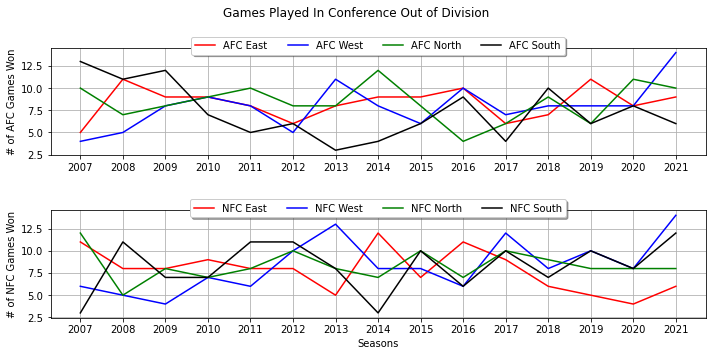

In [16]:
#Plotting the AFC and NFC division win count for each season

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))
fig.suptitle('Games Played In Conference Out of Division')

#AFC Divisions
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC East'], color='red', label='AFC East')
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC West'], color='blue', label='AFC West')
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC North'], color='green', label='AFC North')
ax1.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['AFC South'], color='black', label='AFC South')
#ax1.legend(bbox_to_anchor=(1.1, 1.05))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=True)
ax1.set(xlabel=' ', ylabel='# of AFC Games Won')
#plt.ylabel('# of Games Won')
#plt.xlabel('Season')
ax1.xaxis.set_ticks(np.arange(min(out_div_stats['Season']), max(out_div_stats['Season'])+1))

#NFC Divisions
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC East'], color='red', label='NFC East')
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC West'], color='blue', label='NFC West')
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC North'], color='green', label='NFC North')
ax2.plot(out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC South'], color='black', label='NFC South')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=True)
ax2.set(xlabel=' ', ylabel='# of AFC Games Won')
#plt.ylabel('# of Games Won')
#plt.xlabel('Season')
plt.xticks(np.arange(min(out_div_stats['Season']), max(out_div_stats['Season'])+1))
ax2.set(xlabel='Seasons', ylabel='# of NFC Games Won')

fig.tight_layout()
ax1.grid()
ax2.grid()
plt.show()

In [17]:
#Examing the data for in conference but out of division games

#out_div_stats['Div'].groupby(out_conf_stats['Season']).value_counts().unstack()
print(out_div_stats['Div'].value_counts())

#The results appear to be the same as the out of Conference games
print('\n')
print('AFC North Teams')
print(out_conf_stats['Team'][out_conf_stats['Div']=='AFC North'].value_counts())
print('NFC West Teams')
print(out_conf_stats['Team'][out_conf_stats['Div']=='NFC West'].value_counts())
print('NFC North Teams')
print(out_conf_stats['Team'][out_conf_stats['Div']=='NFC North'].value_counts())

AFC North    126
NFC West     125
AFC East     125
NFC North    125
NFC South    124
AFC West     119
NFC East     117
AFC South    110
Name: Div, dtype: int64


AFC North Teams
Steeler    39
Ravens     39
Bengals    27
Browns     21
Name: Team, dtype: int64
NFC West Teams
Seahawks     34
Cardinals    34
49ers        31
Rams         26
Name: Team, dtype: int64
NFC North Teams
Packers    40
Bears      33
Vikings    31
Lions      21
Name: Team, dtype: int64


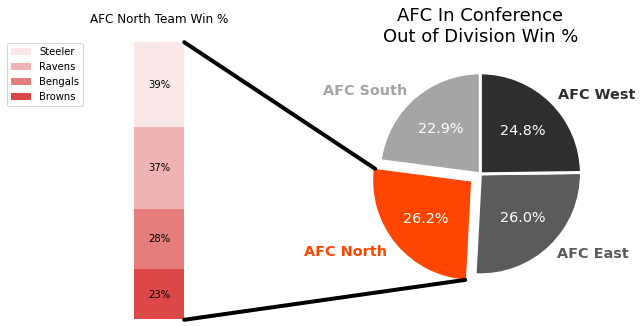

In [18]:
#Looking to see what divisions has the won the most games in the NFC

#divisions in AFC
afc_north = out_div_stats['Div'].value_counts()['AFC North']
afc_south = out_div_stats['Div'].value_counts()['AFC South']
afc_east = out_div_stats['Div'].value_counts()['AFC East']
afc_west = out_div_stats['Div'].value_counts()['AFC West']

#teams in AFC South
#calculating the win percentage for each team = 
# = total team wins from out_div_stats dataframe 
#/ total games team played from out_div data frame (in conference but outside of division)
pit = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Steeler'] / out_div[(out_div['HomeTeam']=='Steeler')|(out_div['AwayTeam']=='Steeler')].shape[0]
bal = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Ravens'] / out_div[(out_div['HomeTeam']=='Ravens')|(out_div['AwayTeam']=='Ravens')].shape[0]
cin = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Bengals'] / out_div[(out_div['HomeTeam']=='Bengals')|(out_div['AwayTeam']=='Bengals')].shape[0]
cle = out_div_stats['Team'][out_div_stats['Div']=='AFC North'].value_counts()['Browns'] / out_div[(out_div['HomeTeam']=='Browns')|(out_div['AwayTeam']=='Browns')].shape[0]

afc_labels = ['AFC South', 'AFC North', 'AFC East', 'AFC West']
afc_values = [afc_south, afc_north, afc_east, afc_west]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))
fig.subplots_adjust(wspace=0)

# Get four different grey colors.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(afc_values))))
# Swap in a bright blue for the Lacrosse color.
colors[1] = 'orangered'

# You could also just manually assign colors very easily.
# colors = ['purple', 'black', 'pink', 'aqua']

patches, texts, pcts = ax2.pie(
    afc_values, labels=afc_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    #explode is use to select what wedge slides out
    explode=(0, 0.1, 0, 0))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax2.set_title('AFC In Conference' + '\n' 'Out of Division Win %', fontsize=18)
plt.tight_layout()


#Creating bar chart for games won by each nfc south team
afcnorth_labels = ['Browns', 'Bengals', 'Ravens', 'Steeler']
afcnorth_values = [cle, cin, bal, pit]
bottom = 1
width = 0.5

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(afcnorth_values, afcnorth_labels)])):
    bottom -= height
    bc = ax1.bar(0, height, width, bottom=bottom, color='C3', label=label,
                 alpha=0.1 + 0.25 * j)
    ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('AFC North Team Win %')
ax1.legend(bbox_to_anchor=(0.2, 0.95), loc='upper right', borderaxespad=0)
ax1.axis('off')
ax1.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = patches[0].theta1, patches[0].theta2
center, r = patches[0].center, patches[0].r
bar_height = sum(afcnorth_values)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
con = ConnectionPatch(xyA=(-width / 0.48, 0.05), coordsA=ax2.transData,
                      xyB=(x+0.25, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

# draw bottom connecting line
#x = r * np.cos(np.pi / 180 * theta2) + center[0]
#y = r * np.sin(np.pi / 180 * theta2) + center[1]
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
con = ConnectionPatch(xyA=(-0.15, -1.05), coordsA=ax2.transData,
                      xyB=(x+0.25, y-1.27), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

plt.show()

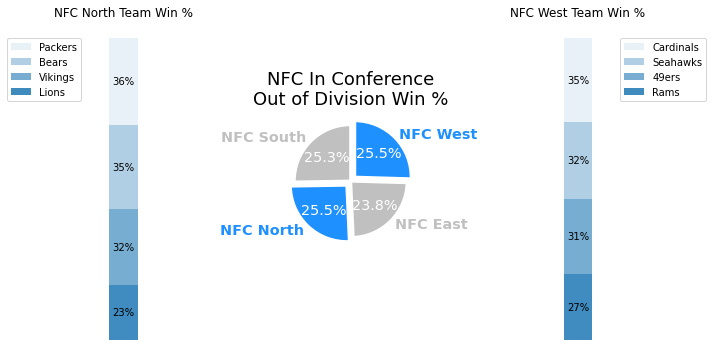

In [19]:
#Looking to see what divisions has the won the most games in the NFC

#divisions in NFC
nfc_north = out_div_stats['Div'].value_counts()['NFC North']
nfc_south = out_div_stats['Div'].value_counts()['NFC South']
nfc_east = out_div_stats['Div'].value_counts()['NFC East']
nfc_west = out_div_stats['Div'].value_counts()['NFC West']

nfc_labels = ['NFC South', 'NFC North', 'NFC East', 'NFC West']
nfc_values = [nfc_south, nfc_north, nfc_east, nfc_west]

#calculating the win percentage for each team = 
# = total team wins from out_div_stats dataframe 
#/ total games team played from out_div data frame (in conference but outside of division)

nfcwest_values = []
nfcwest_labels = ['Rams','49ers','Seahawks','Cardinals']
nfcnorth_values = []
nfcnorth_labels = ['Lions','Vikings','Bears','Packers']

#NFC West Teams in conference out of division win %
for lab in nfcwest_labels:
    nfcwest_values.append(out_div_stats['Team'][out_div_stats['Div']=='NFC West'].value_counts()[lab]/out_div[(out_div['HomeTeam']==lab)|(out_div['AwayTeam']==lab)].shape[0])

#NFC North Teams in conference out of division win %
for lab in nfcnorth_labels:
    nfcnorth_values.append(out_div_stats['Team'][out_div_stats['Div']=='NFC North'].value_counts()[lab]/out_div[(out_div['HomeTeam']==lab)|(out_div['AwayTeam']==lab)].shape[0])


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,5))
fig.subplots_adjust(wspace=0)

# manually assign colors
colors = ['silver', 'dodgerblue', 'silver', 'dodgerblue']

patches, texts, pcts = ax2.pie(
    nfc_values, labels=nfc_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    #explode is use to select what wedge slides out
    explode=(0, 0.1, 0, 0.1))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax2.set_title('NFC In Conference' + '\n' 'Out of Division Win %', fontsize=18)
plt.tight_layout()


#Creating bar chart for % of games won by each NFC North team in conference out of division
bottom = 1
width = 0.5

#Creating left bar chart
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(nfcnorth_values, nfcnorth_labels)])):
    bottom -= height
    bc = ax1.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax1.set_title('NFC North Team Win %')
ax1.legend(bbox_to_anchor=(0.2, 0.95), loc='upper right', borderaxespad=0)
ax1.axis('off')
ax1.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = patches[0].theta1, patches[0].theta2
center, r = patches[0].center, patches[0].r
bar_height = sum(nfcnorth_values)

#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
# draw top connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
#con = ConnectionPatch(xyA=(-width / 0.47, -0.1), coordsA=ax2.transData,
#                      xyB=(x+0.25, y), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#ax2.add_artist(con)
#con.set_linewidth(4)

# draw bottom connecting line
#con = ConnectionPatch(xyA=(-0.1, -1.1), coordsA=ax2.transData,
#                      xyB=(0.26, -0.25), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#con.set_linewidth(4)
#ax2.add_artist(con)


#Creating Right bar chart
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(nfcwest_values, nfcwest_labels)])):
    bottom -= height
    bc = ax3.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax3.set_title('NFC West Team Win %')
ax3.legend(bbox_to_anchor=(0.8, 0.95), loc='upper left', borderaxespad=0)
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)


bar_height = sum(nfcwest_values)
#xyA,xyB = (x-axis, y-axis) use this to adjust the start and end point of the line
# draw top connecting line
#con = ConnectionPatch(xyA=(0.07, 1.05), coordsA=ax2.transData,
#                      xyB=(7.8, 1.0), coordsB=ax1.transData)
#con = ConnectionPatch(xyA=(1.5, 1.7), coordsA=ax2.transData,
#                      xyB=(7.8, 1.0), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#ax2.add_artist(con)
#con.set_linewidth(4)

# draw bottom connecting line
#con = ConnectionPatch(xyA=(1.1, 0.1), coordsA=ax2.transData,
#                      xyB=(7.8, -0.25), coordsB=ax1.transData)
#con.set_color([0, 0, 0])
#con.set_linewidth(4)
#ax2.add_artist(con)


plt.show()

Text(0.5, 0.8, 'All Games Played For Each Team')

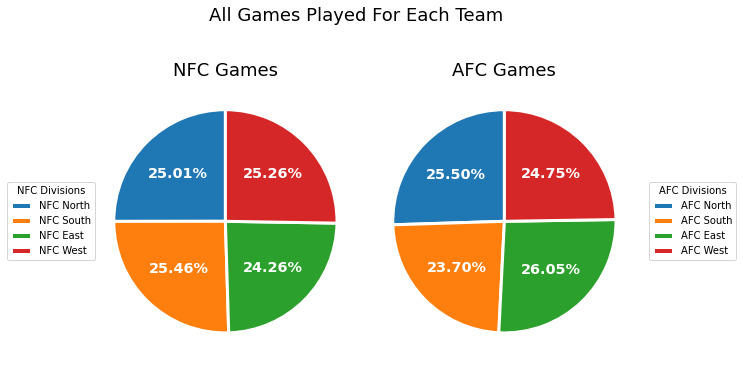

In [20]:
#Looking at all games to see if the same divisions as above have the most wins

#Calculating values counts of wins for each conference and division in the NFL
afc_north = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC North'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC North'])
afc_south = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC South'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC South'])
afc_east = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC East'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC East'])
afc_west = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['AFC West'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['AFC West'])
nfc_north = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC North'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC North'])
nfc_south = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC South'] + 
             nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC South'])
nfc_east = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC East'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC East'])
nfc_west = (nfl['Div_Home'][nfl['H_WinTeam']==1].value_counts()['NFC West'] + 
            nfl['Div_Away'][nfl['H_WinTeam']==0].value_counts()['NFC West'])

#Looking to see what divisions in each confrences is the strongest when against other divisions
#Comparing games only played in their own conference but not in their own division

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
fig.subplots_adjust(wspace=0)

#Creating NFC pie chart
nfc_labels = ['NFC North', 'NFC South', 'NFC East', 'NFC West']
nfc_values = [nfc_north, nfc_south, nfc_east, nfc_west]

patches, texts, pcts = ax1.pie(
    x=nfc_values, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax1.set_title('NFC Games', fontsize=18)
ax1.legend(patches, nfc_labels,
          title="NFC Divisions",
          loc="center left",
          bbox_to_anchor=(-0.3, 0, 0.5, 1))

#Creating AFC pie chart
afc_labels = ['AFC North', 'AFC South', 'AFC East', 'AFC West']
afc_values = [afc_north, afc_south, afc_east, afc_west]

patches, texts, pcts = ax2.pie(
    x=afc_values, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.setp(pcts, color='white', fontweight='bold')
ax2.set_title('AFC Games', fontsize=18)
ax2.legend(patches, afc_labels,
          title="AFC Divisions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

fig.suptitle('All Games Played For Each Team',x=0.5, y=0.8, fontsize=18, va='top')


****

Notes for analysis of each division and individual team.


****

In [21]:
#Clean the capacity column to convert the values in to a integer
nfl['Capacity'] = nfl['Capacity'].str.replace(',','')
print(nfl['Capacity'].dtypes)
nfl['Capacity'] = nfl['Capacity'].astype(str).astype(int)
print(nfl['Capacity'].dtypes)

object
int64


In [22]:
#Cleaning the turf column for all category values match
nfl['Turf'] = nfl['Turf'].str.replace('t','T')

count     3999.000000
mean     70677.677919
std       5657.495029
min      61500.000000
25%      66200.000000
50%      69143.000000
75%      74867.000000
max      82500.000000
Name: Capacity, dtype: float64


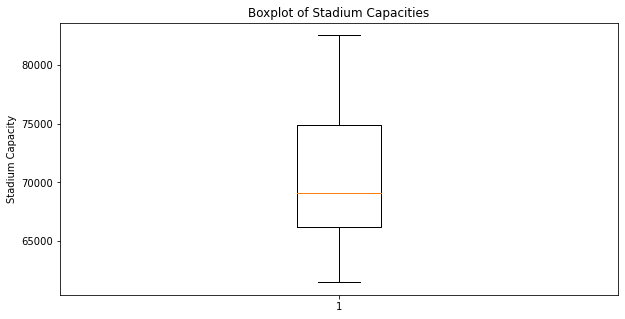

In [23]:
#Looking at the different stadium capacities

print(nfl['Capacity'].describe())

fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(nfl['Capacity'])
plt.title('Boxplot of Stadium Capacities')
plt.ylabel('Stadium Capacity')
plt.show()

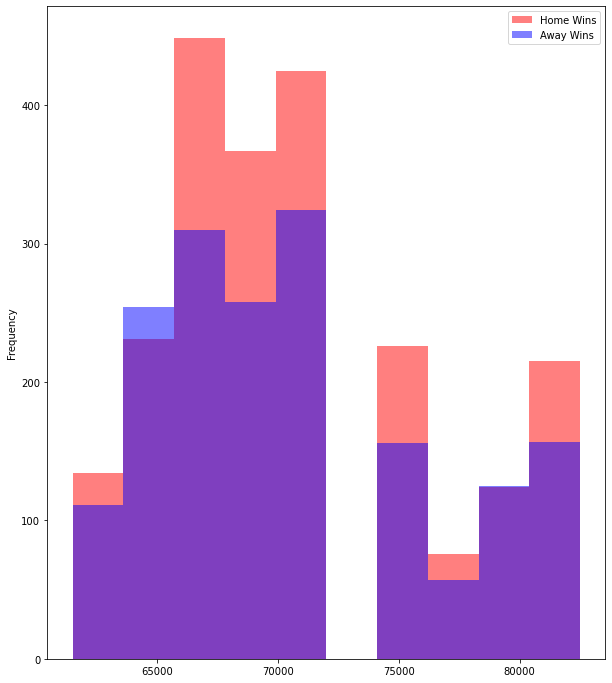

In [24]:
#hist_trans(df_train, 'Age')
plt.figure(figsize=(10,12))
gamehome = nfl[nfl['H_WinTeam'] == 1]
gameaway = nfl[nfl['H_WinTeam'] == 0]
gamehome['Capacity'].plot.hist(alpha=0.5,color='red',bins=10)
gameaway['Capacity'].plot.hist(alpha=0.5,color='blue',bins=10)
plt.legend(['Home Wins','Away Wins'])
plt.show()

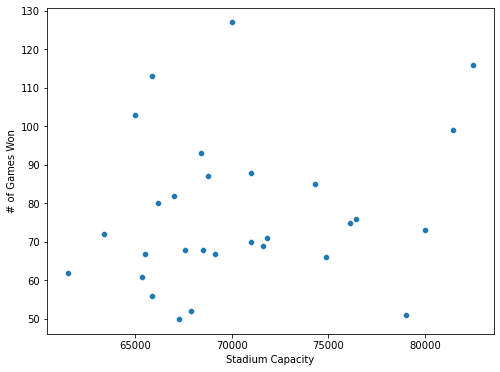

In [25]:
#nfl['H_WinTeam'].groupby(nfl['Capacity']).value_counts().unstack()[1.0]
cap_data = nfl['H_WinTeam'].groupby(nfl['Capacity']).value_counts().unstack()
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Capacity', y=1.0, data=cap_data) 
plt.ylabel('# of Games Won')
plt.xlabel('Stadium Capacity')
plt.show()

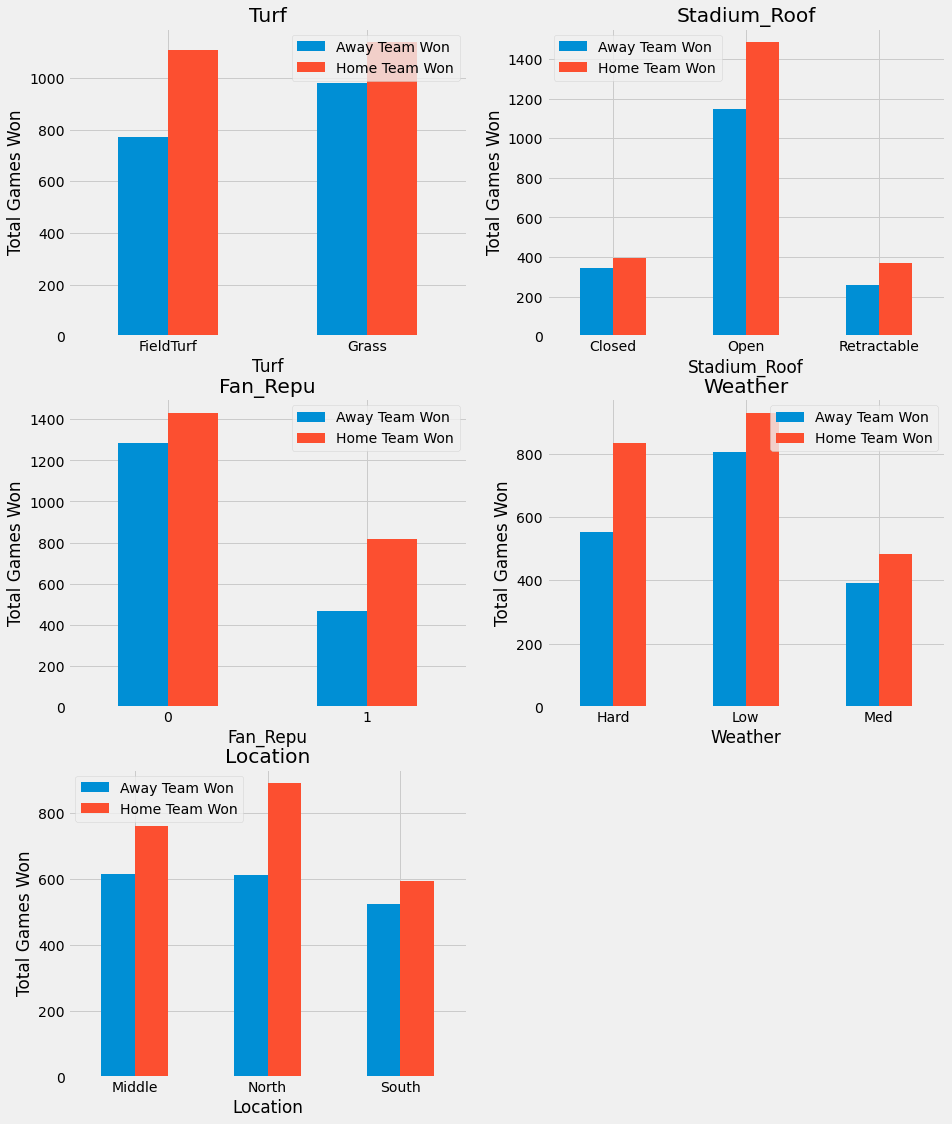

In [57]:
#Plotting the different stadium features

stadium_feats = ['Turf', 'Stadium_Roof', 'Fan_Repu','Weather', 'Location']

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,6), stadium_feats):
    ax_i = plt.subplot(3, 2, i)
    cat_group = nfl.groupby([feat,'H_WinTeam']).size().unstack('H_WinTeam')
    cat_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Total Games Won')
    ax_i.set_title(feat)
    ax_i.legend(['Away Team Won', 'Home Team Won'])

plt.show()

In [27]:
#Data Frame of the stadium stats
#'HomeTeam', 'Opened', 'Cost', 'Capacity'
stadium_headers = ['H_WinTeam', 'Turf', 'Stadium_Roof', 'Fan_Repu','Weather', 'Location']
stadium_stats = nfl[stadium_headers]
stadium_stats.head()


#print(nfl['H_WinTeam'].groupby(nfl['Turf']).value_counts().unstack())

,H_WinTeam,Turf,Stadium_Roof,Fan_Repu,Weather,Location
0,1.0,FieldTurf,Closed,0,Low,South
1,0.0,Grass,Open,1,Med,Middle
2,1.0,Grass,Open,1,Med,Middle
3,0.0,Grass,Open,0,Low,South
4,0.0,Grass,Open,1,Hard,North


In [28]:
#Converting variables in to dummy values
stadium_stats = pd.get_dummies(stadium_stats)
stadium_stats.head()

,H_WinTeam,Fan_Repu,Turf_FieldTurf,Turf_Grass,Stadium_Roof_Closed,Stadium_Roof_Open,Stadium_Roof_Retractable,Weather_Hard,Weather_Low,Weather_Med,Location_Middle,Location_North,Location_South
0,1.0,0,1,0,1,0,0,0,1,0,0,0,1
1,0.0,1,0,1,0,1,0,0,0,1,1,0,0
2,1.0,1,0,1,0,1,0,0,0,1,1,0,0
3,0.0,0,0,1,0,1,0,0,1,0,0,0,1
4,0.0,1,0,1,0,1,0,1,0,0,0,1,0


<AxesSubplot:>

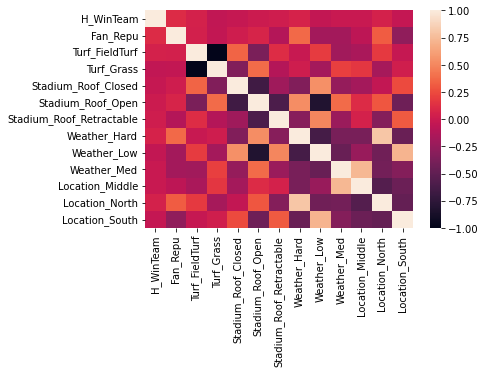

In [29]:
#Plotting the correlation between the statidum features and home wins

stadium_corr = stadium_stats.corr()['H_WinTeam'][1:]

sns.heatmap(stadium_stats.corr())
#print(stadium_stats.corr())

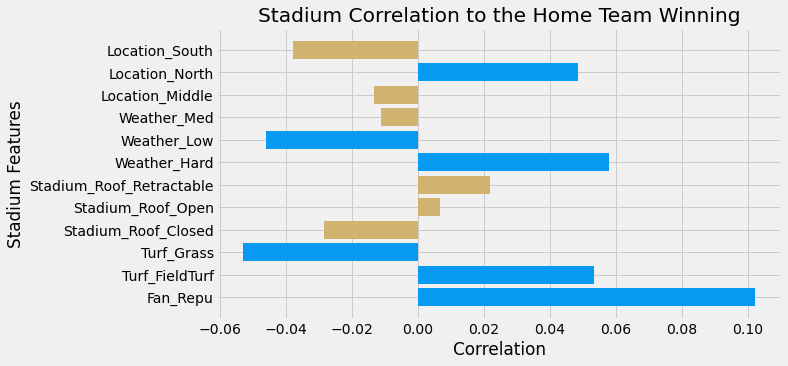

In [30]:
#Plotting the stadium feature correlations to home team winning

style.use('fivethirtyeight')
#style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(stadium_corr.index, stadium_corr)

high_corr = (stadium_corr > 0.04) | (-0.04 > stadium_corr) 
color_map = high_corr.map({True: '#069AF3', False: '#D1B26F'})
ax.barh(stadium_corr.index, stadium_corr,
       color = color_map)

ax.set(xlabel='Correlation', ylabel='Stadium Features',
       title='Stadium Correlation to the Home Team Winning')
plt.show()

In [31]:
#Creating a data frame of all team wins for both the home and away team

#team_headers = ['Season','H_WinTeam','Conf_Home','Conf_Away', 'Div_Home', 'Div_Away','HomeTeam','AwayTeam']

#Make a table of just the win, divisions and conferences - Away
team_away = nfl[['Season','H_WinTeam','Conf_Away', 'Div_Away','AwayTeam'
                 ]][nfl['H_WinTeam']==0]
team_away = team_away.rename({'H_WinTeam':'H_Win', 'Conf_Away':'Conf', 'Div_Away':'Div', 'AwayTeam':'Team'},axis=1)
print(team_away.head())

#Make a table of just the win, divisions and conferences - Home
team_home = nfl[['Season','H_WinTeam','Conf_Home', 'Div_Home', 'HomeTeam'
                 ]][nfl['H_WinTeam']==1]
team_home = team_home.rename({'H_WinTeam':'H_Win', 'Conf_Home':'Conf', 'Div_Home':'Div','HomeTeam':'Team'},axis=1)
print(team_home.head())

#combinning both files to make the data easier to plot and analyze
team_stats = pd.concat([team_home, team_away], axis=0)
#The number of rows matches the full data frame 'nfl'
print(team_stats.shape)
#print(out_conf_stat.head())

   Season  H_Win Conf        Div     Team
1    2021    0.0  AFC  AFC North  Bengals
3    2021    0.0  NFC   NFC West     Rams
4    2021    0.0  NFC   NFC West    49ers
5    2021    0.0  AFC  AFC North  Bengals
8    2021    0.0  NFC   NFC West    49ers
   Season  H_Win Conf        Div        Team
0    2021    1.0  NFC   NFC West        Rams
2    2021    1.0  AFC   AFC West      Chiefs
6    2021    1.0  NFC   NFC West        Rams
7    2021    1.0  AFC   AFC West      Chiefs
9    2021    1.0  NFC  NFC South  Buccaneers
(3999, 5)


In [32]:
team_list = team_stats['Team'].unique().tolist()
season_list = team_stats['Season'].unique().tolist()
#team_stats_fill = team_stats.groupby(["Season", "Team"])["H_Win"].value_counts(normalize=True).unstack(fill_value=0).stack()

team_h_win_percent = {}
team_h_good_percent = {}
team_h_bad_percent = {}
for team in team_list:
    team_win_odds = []
    team_good_odds = []
    team_bad_odds = []
    for year in season_list:
        #print(year)
        team_wins = team_stats[['H_Win']][(team_stats['Team']==team) & (team_stats['Season']==year)]
        #print(team_wins)
        try:
            win_odds = team_wins.value_counts(normalize=True)[1]
        except:
            win_odds = 0
        #win_odds = team_wins.value_counts()[1]/team_wins.value_counts().sum()
        #print(win_odds)
        team_win_odds.append(win_odds)
        
        #If team is having a good or bad season if home advantage stays
        #print(team_wins.value_counts().sum())
        if team_wins.value_counts().sum() >= 10:
            team_good_odds.append(win_odds)
            #print(team_good_odds)
        if team_wins.value_counts().sum() <= 6:
            team_bad_odds.append(win_odds)
        #Leaving out ok seasons with 9, 8 and 7 wins
        
    team_h_win_percent[team] = round(stat.median(team_win_odds) * 100,2)
    #team_h_win_percent[team] = round(stat.mean(team_win_odds) * 100,2)
    if len(team_good_odds) != 0:
        team_h_good_percent[team] = round(stat.mean(team_good_odds) * 100,2)
    if len(team_bad_odds) != 0:
        team_h_bad_percent[team] = round(stat.median(team_win_odds) * 100,2)

print(team_h_win_percent)



{'Rams': 50.0, 'Chiefs': 50.0, 'Buccaneers': 50.0, 'Bills': 58.33, 'Bengals': 66.67, 'Raiders': 50.0, 'Jaguars': 62.5, 'Vikings': 62.5, 'Browns': 66.67, 'Dolphins': 60.0, 'Lions': 57.14, 'Steeler': 58.33, 'Packers': 57.14, 'Seahawks': 60.0, '49ers': 53.85, 'Chargers': 55.56, 'Saints': 53.85, 'Bears': 57.14, 'Patriots': 57.14, 'Titans': 53.85, 'Cowboys': 53.85, 'Falcons': 53.85, 'Texans': 54.55, 'Jets': 55.56, 'Eagles': 50.0, 'Colts': 54.55, 'Broncos': 57.14, 'WashFB': 50.0, 'Ravens': 60.0, 'Giants': 50.0, 'Cardinals': 60.0, 'Panthers': 58.33}


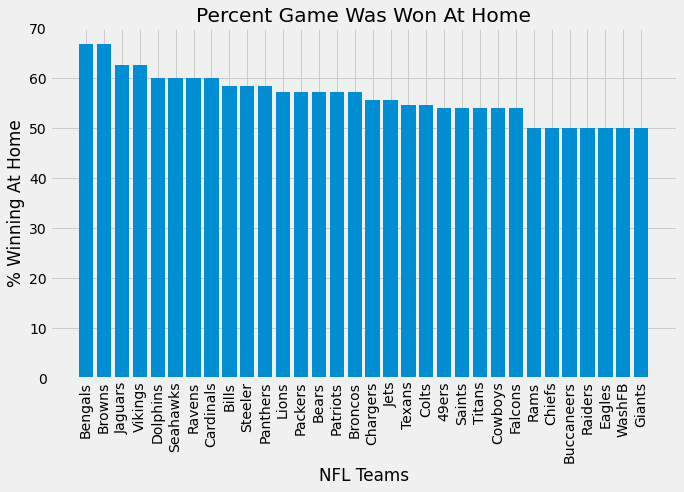

In [33]:
#plot the home win percentage for teams
team_h_win_sort = dict(sorted(team_h_win_percent.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(10, 6))

#ax.barh(range(len(team_h_win_sort)),team_h_win_sort.values())
ax.bar(team_h_win_sort.keys(), team_h_win_sort.values())
plt.title('Percent Game Was Won At Home')
plt.ylabel('% Winning At Home')
plt.xlabel('NFL Teams')
plt.xticks(rotation=90, ha='center')
plt.show()

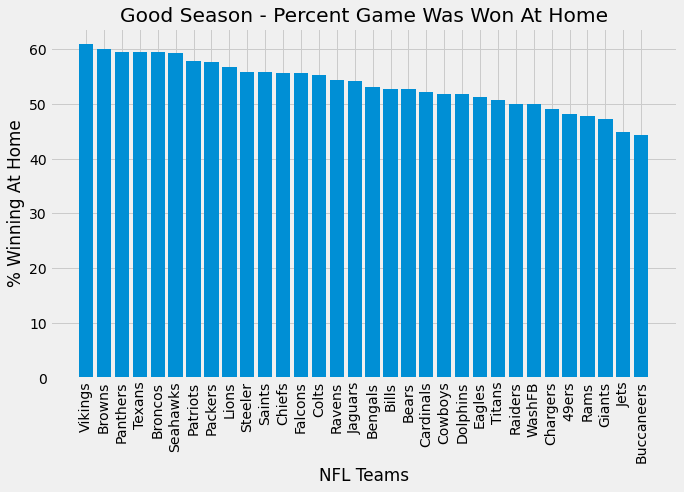

In [34]:
#plot the home win percentage for team seasons with good records
team_h_good_sort = dict(sorted(team_h_good_percent.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(10, 6))

#ax.barh(range(len(team_h_win_sort)),team_h_win_sort.values())
ax.bar(team_h_good_sort.keys(), team_h_good_sort.values())
plt.title('Good Season - Percent Game Was Won At Home')
plt.ylabel('% Winning At Home')
plt.xlabel('NFL Teams')
plt.xticks(rotation=90, ha='center')

plt.show()

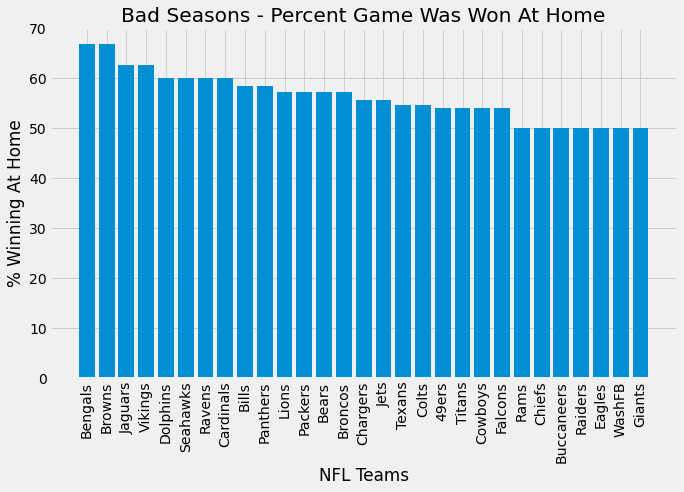

In [35]:
#plot the home win percentage for team seasons with good records
team_h_bad_sort = dict(sorted(team_h_bad_percent.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(10, 6))

#ax.barh(range(len(team_h_win_sort)),team_h_win_sort.values())
ax.bar(team_h_bad_sort.keys(), team_h_bad_sort.values())
plt.title('Bad Seasons - Percent Game Was Won At Home')
plt.ylabel('% Winning At Home')
plt.xlabel('NFL Teams')
plt.xticks(rotation=90, ha='center')

plt.show()

In [36]:
#h_win_percent = Counter(team_h_bad_percent) + Counter(team_h_good_percent) + Counter(team_h_win_percent)
h_good_bad_percent = Counter(team_h_bad_percent) + Counter(team_h_good_percent)
print(h_good_bad_percent)

Counter({'Browns': 126.67, 'Vikings': 123.41, 'Bengals': 119.82, 'Seahawks': 119.28, 'Panthers': 117.92, 'Jaguars': 116.67, 'Broncos': 116.55, 'Packers': 114.81, 'Ravens': 114.37, 'Texans': 114.05, 'Lions': 113.96000000000001, 'Cardinals': 112.17, 'Dolphins': 111.82, 'Bills': 111.11, 'Bears': 109.92, 'Colts': 109.81, 'Falcons': 109.5, 'Cowboys': 105.71000000000001, 'Chiefs': 105.7, 'Chargers': 104.6, 'Titans': 104.52000000000001, '49ers': 101.95, 'Eagles': 101.3, 'Jets': 100.5, 'Raiders': 100.0, 'WashFB': 100.0, 'Rams': 97.72999999999999, 'Giants': 97.34, 'Buccaneers': 94.28999999999999, 'Patriots': 57.83, 'Steeler': 55.88, 'Saints': 55.8})


In [37]:
#top 11 teams with high home win percent
#bottom 11 teams with low home win percent
h_win_top_teams = []
h_win_bottom_teams = []

#clean code to just take the top 11 and bottom 11 teams of h_good_bad_percent

for key, value in h_good_bad_percent.items():
    if value > 113:
        h_win_top_teams.append(key)
    if value < 102:
        h_win_bottom_teams.append(key)

print(h_win_top_teams)
print(h_win_bottom_teams)


['Bengals', 'Jaguars', 'Vikings', 'Browns', 'Lions', 'Packers', 'Seahawks', 'Texans', 'Broncos', 'Ravens', 'Panthers']
['Rams', 'Buccaneers', 'Raiders', '49ers', 'Jets', 'Eagles', 'WashFB', 'Giants', 'Steeler', 'Saints', 'Patriots']


In [38]:
#analyzing stadium stats of the teams with the top home win percentage

#'H_WinTeam', 'Opened', 'Cost', 'Capacity',
stadium_headers = ['HomeTeam', 'Turf', 'Stadium_Roof', 'Fan_Repu','Weather', 'Location']

stadium = nfl[stadium_headers].drop_duplicates('HomeTeam', keep='first')
#stadium.shape

top_stadium = stadium[stadium['HomeTeam'].isin(h_win_top_teams)]
#top_stadium
bottom_stadium = stadium[stadium['HomeTeam'].isin(h_win_bottom_teams)]
#bottom_stadium

stadium_compare = pd.concat([top_stadium, bottom_stadium], axis=0, ignore_index=False)
stadium_compare['col'] = (len(top_stadium)*(0,) + len(bottom_stadium)*(1,))
stadium_compare.reset_index(inplace=True)
stadium_compare
#stadium_compare = pd.get_dummies(stadium_compare)

#sns.factorplot(x='HomeTeam',y='Fan_Repu', hue='col', kind='bar', data=stadium_compare)


,index,HomeTeam,Turf,Stadium_Roof,Fan_Repu,Weather,Location,col
0,4,Packers,Grass,Open,1,Hard,North,0
1,11,Bengals,FieldTurf,Open,0,Med,Middle,0
2,15,Jaguars,Grass,Open,0,Low,South,0
3,18,Vikings,FieldTurf,Closed,1,Low,North,0
4,20,Browns,Grass,Open,0,Hard,North,0
5,21,Ravens,FieldTurf,Open,0,Med,Middle,0
6,22,Texans,Grass,Retractable,0,Low,South,0
7,25,Lions,FieldTurf,Closed,0,Low,North,0
8,27,Broncos,Grass,Open,1,Hard,Middle,0
9,31,Seahawks,FieldTurf,Open,1,Hard,North,0


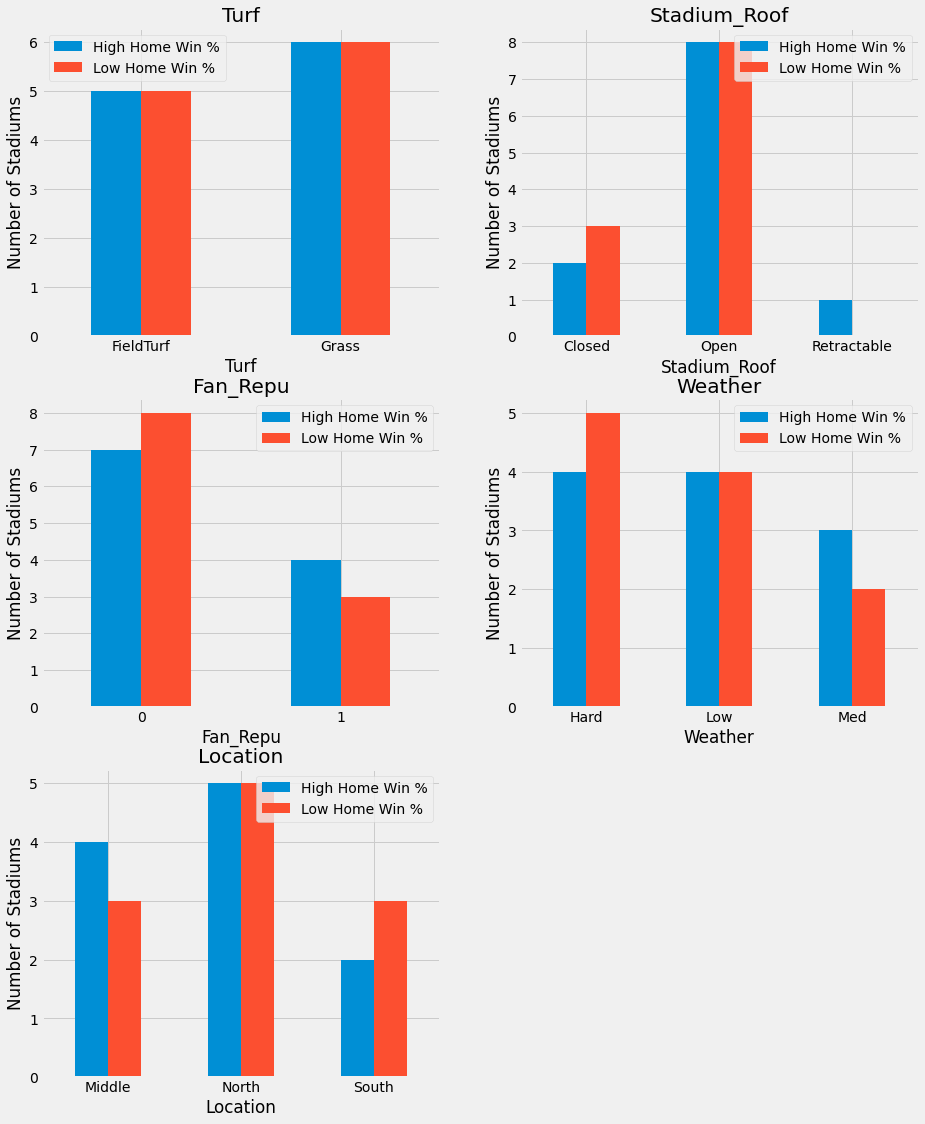

In [39]:
#Bar plots comparing the stadium features from
#the teams with the high home win percent and low home win percent.

stadium_feats = ['Turf', 'Stadium_Roof', 'Fan_Repu','Weather', 'Location']

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,6), stadium_feats):
    ax_i = plt.subplot(3, 2, i)
    cat_group = stadium_compare.groupby([feat,'col']).size().unstack('col')
    cat_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Number of Stadiums')
    ax_i.set_title(feat)
    ax_i.legend(['High Home Win %', 'Low Home Win %'])

plt.show()

In [40]:
nfl.columns

Index(['Season', 'Week', 'DateTime', 'H_WinTeam', 'HomeTeam', 'HomePts',
       'HomeYds', 'HomeTO', 'AwayTeam', 'AwayPts', 'AwayYds', 'AwayTO',
       'Capacity', 'Opened', 'Turf', 'Cost', 'Stadium_Roof', 'Fan_Repu',
       'Weather', 'Location', 'Div_Home', 'Conf_Home', 'Rank_Off_Home',
       'Yards/G_Off_Home', 'Rush/G_Off_Home', 'Rush/P_Off_Home',
       'Pass/G_Off_Home', 'QBR_Off_Home', 'Sacks_Off_Home', '3rd%_Off_Home',
       'Poss/G_Off_Home', 'Pts/G_Off_Home', 'Off_Pre_RK_Home', 'Rank_Def_Home',
       'Yards/G_Def_Home', 'Rush/G_Def_Home', 'Rush/P_Def_Home',
       'Pass/G_Def_Home', 'QBR_Def_Home', 'Sacks_Def_Home', '3rd%_Def_Home',
       'Poss/G_Def_Home', 'Pts/G_Def_Home', 'Def_Pre_RK_Home', 'RK_Home',
       'QBR_Home', 'PAA_Home', 'Plays_Home', 'EPA_Home', 'PASS_Home',
       'RUN_Home', 'SACK_Home', 'PEN_Home', 'RAW_Home', 'QBName_Home',
       'QB_Pre_RK_Home', 'Div_Away', 'Conf_Away', 'Rank_Off_Away',
       'Yards/G_Off_Away', 'Rush/G_Off_Away', 'Rush/P_Off_Away',

In [79]:
#comparing Quarterback, Offense and Defense ranks to see what is more important

rank_headers = ['Season', 'H_WinTeam', 'Rank_Off_Home', 'Rank_Def_Home', 'RK_Home',
                'Rank_Off_Away', 'Rank_Def_Away', 'RK_Away']

rank_df = nfl[rank_headers]

#Overall rank - average of quarterback, offense and defense ranks
rank_df['Ranks_Mean_Home'] = rank_df[['Rank_Off_Home',
                                             'Rank_Def_Home','RK_Home']].mean(axis=1)

rank_df['Ranks_Mean_Away'] = rank_df[['Rank_Off_Away',
                                             'Rank_Def_Away','RK_Away']].mean(axis=1)

#print(rank_df.dtypes)

rank_features = ['Rank_Off', 'Rank_Def', 'RK', 'Ranks_Mean']


#Compare ranks winning team vs losing team

for feat in rank_features:
    rank_df['del_'+feat] = rank_df.apply(lambda x: x[feat+'_Home']-x[feat+'_Away'] if x['H_WinTeam']==1 
                                       else x[feat+'_Away'] - x[feat+'_Home'], axis=1)
    
rank_df.head()

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1520/1053914948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df['Ranks_Mean_Home'] = rank_df[['Rank_Off_Home',
/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1520/1053914948.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_df['Ranks_Mean_Away'] = rank_df[['Rank_Off_Away',
/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1520/1053914948.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Season,H_WinTeam,Rank_Off_Home,Rank_Def_Home,RK_Home,Rank_Off_Away,Rank_Def_Away,RK_Away,Ranks_Mean_Home,Ranks_Mean_Away,del_Rank_Off,del_Rank_Def,del_RK,del_Ranks_Mean
0,2021,1.0,9,17,4.0,7,3,13.0,10.000000,7.666667,2.0,14.0,-9.0,2.333333
1,2021,0.0,3,27,5.0,13,18,12.0,11.666667,14.333333,10.0,-9.0,7.0,2.666667
2,2021,1.0,3,27,5.0,5,1,6.0,11.666667,4.000000,-2.0,26.0,-1.0,7.666667
3,2021,0.0,2,13,2.0,9,17,4.0,5.666667,10.000000,7.0,4.0,2.0,4.333333
4,2021,0.0,10,9,1.0,7,3,13.0,6.666667,7.666667,-3.0,-6.0,12.0,1.000000


       del_Rank_Off  del_Rank_Def       del_RK  del_Ranks_Mean
count   3999.000000   3999.000000  3541.000000     3999.000000
mean      -3.940485     -2.826457    -4.454391       -3.787822
std       12.442904     12.747594    12.029999        8.953055
min      -31.000000    -31.000000   -32.000000      -28.500000
25%      -13.000000    -12.000000   -13.000000      -10.000000
50%       -5.000000     -3.000000    -5.000000       -4.000000
75%        5.000000      6.000000     4.000000        2.166667
max       31.000000     31.000000    32.000000       27.000000


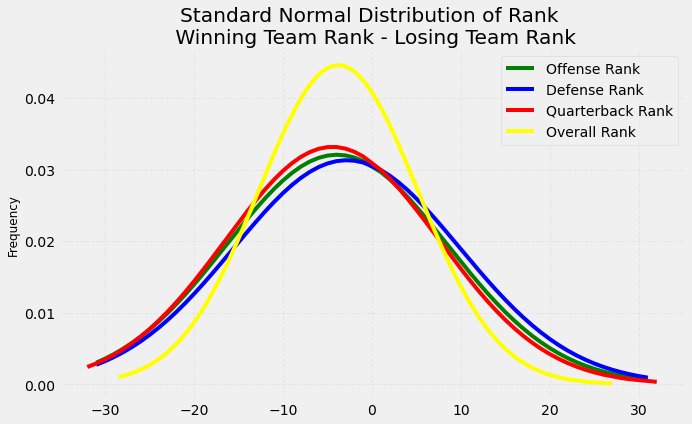

In [82]:
# Plotting the rank difference between winner and loser for offense, defense and quarterback

rank_delta_feats = ['del_Rank_Off', 'del_Rank_Def', 'del_RK', 'del_Ranks_Mean']
rank_labels = ['Offense Rank', 'Defense Rank', 'Quarterback Rank', 'Overall Rank']

print(rank_df[rank_delta_feats].describe())

fig = plt.figure(figsize=(10,6))

color_lst = ['green', 'blue', 'red', 'yellow']

#plot of all bell curves over lapping
# Drawing a graph
for feat, label, color in zip(rank_delta_feats, rank_labels, color_lst):
    mean = np.mean(rank_df[feat])
    std = np.std(rank_df[feat])
    # Calculating probability density function (PDF)
    pdf = scistats.norm.pdf(rank_df[feat].sort_values(), mean, std)
    plt.plot(rank_df[feat].sort_values(), pdf, color=color, label=label)



#plt.xlabel("Rank Standard Normal Distribution", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.title('Standard Normal Distribution of Rank \n Winning Team Rank - Losing Team Rank')
plt.legend(loc='upper right')
plt.show()

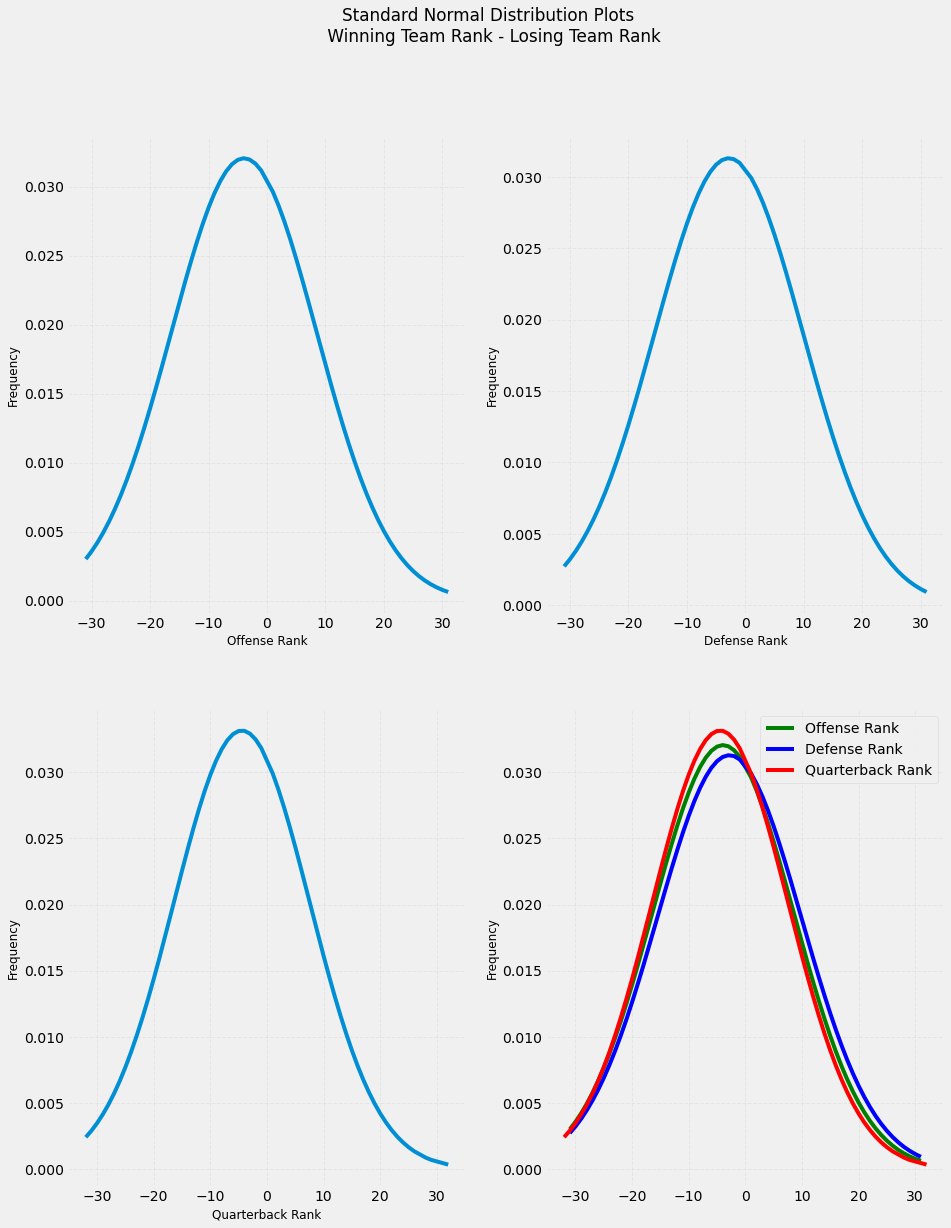

In [43]:

rank_delta_feats = ['del_Rank_Off', 'del_Rank_Def', 'del_RK']
rank_labels = ['Offense Rank', 'Defense Rank', 'Quarterback Rank']

fig = plt.figure(figsize=(14,18))

for i, feat, label in zip(range(1,4), rank_delta_feats, rank_labels):
    ax_i = plt.subplot(2, 2, i)
    mean = np.mean(rank_df[feat])
    std = np.std(rank_df[feat])
    pdf = scistats.norm.pdf(rank_df[feat].sort_values(), mean, std)
    
    plt.plot(rank_df[feat].sort_values(), pdf)
    ax_i.set_xlabel(label, size=12) 
    ax_i.set_ylabel("Frequency", size=12)
    ax_i.grid(True, alpha=0.3, linestyle="--")    

ax4 = plt.subplot(2,2,4)
color_lst = ['green', 'blue', 'red']

#plot of all bell curves over lapping
# Drawing a graph
for feat, label, color in zip(rank_delta_feats, rank_labels, color_lst):
    mean = np.mean(rank_df[feat])
    std = np.std(rank_df[feat])
    pdf = scistats.norm.pdf(rank_df[feat].sort_values(), mean, std)
    ax4.plot(rank_df[feat].sort_values(), pdf, color=color, label=label)
    #ax4.set_xlabel("Standard Normal Distribution", size=12)    
    ax4.set_ylabel("Frequency", size=12)                
    ax4.grid(True, alpha=0.3, linestyle="--")

fig.suptitle('Standard Normal Distribution Plots \n Winning Team Rank - Losing Team Rank')
plt.legend(loc='upper right')
plt.show()

In [75]:
#Creating a data base of just the rank of the winners

rank_headers_home = ['Season', 'H_WinTeam', 'Rank_Off_Home', 'Rank_Def_Home', 'RK_Home']

rank_headers_away = ['Season', 'H_WinTeam', 'Rank_Off_Away', 'Rank_Def_Away', 'RK_Away']

#Make a table of just the win rank - Away
rank_away_win = nfl[rank_headers_away][nfl['H_WinTeam']==0]
rank_away_win = rank_away_win.rename({'H_WinTeam':'H_Win', 'Rank_Off_Away':'Rank_Off', 
                                     'Rank_Def_Away':'Rank_Def', 'RK_Away':'Rank_QB'},axis=1)
#print(off_away_win.head())

#Make a table of just the win rank - Home
rank_home_win = nfl[rank_headers_home][nfl['H_WinTeam']==1]
rank_home_win = rank_home_win.rename({'H_WinTeam':'H_Win', 'Rank_Off_Home':'Rank_Off', 
                                     'Rank_Def_Home':'Rank_Def', 'RK_Home':'Rank_QB'},axis=1)
#print(off_home_win.head())

#combinning both files to make the data easier to plot and analyze
rank_stats_win = pd.concat([rank_home_win, rank_away_win], axis=0)

#Average team rank for offense, defense and quarterback ranks
rank_stats_win['Ranks_mean'] = rank_stats_win[['Rank_QB','Rank_Def','Rank_Off']].mean(axis=1)

print(rank_stats_win.head())
print(rank_stats_win.shape)


   Season  H_Win  Rank_Off  Rank_Def  Rank_QB  Ranks_mean
0    2021    1.0         9        17      4.0   10.000000
2    2021    1.0         3        27      5.0   11.666667
6    2021    1.0         9        17      4.0   10.000000
7    2021    1.0         3        27      5.0   11.666667
9    2021    1.0         2        13      2.0    5.666667
(3999, 6)


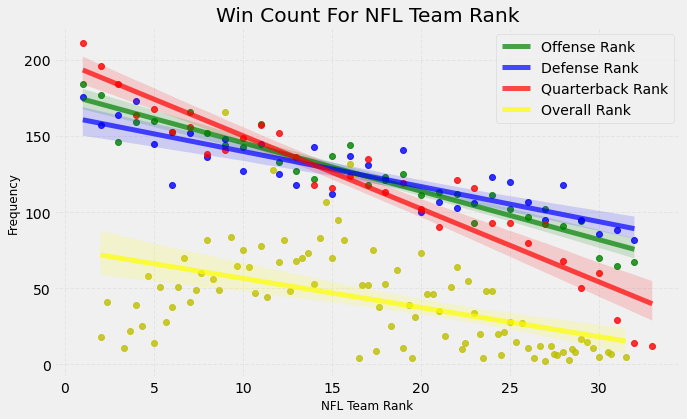

In [76]:
#Use scatter plot for winning rank counts: Quarterback, Offense, Defense

rank_win_feats = ['Rank_Off', 'Rank_Def', 'Rank_QB', 'Ranks_mean']
rank_labels = ['Offense Rank', 'Defense Rank', 'Quarterback Rank', 'Overall Rank']

fig = plt.figure(figsize=(10,6))

color_lst_dot = ['g', 'b', 'r', 'y']
color_lst_line = ['green', 'blue', 'red', 'yellow']

#plot of all bell curves over lapping
# Drawing a graph
for feat, label, c_dot, c_line in zip(rank_win_feats, rank_labels, color_lst_dot, color_lst_line):
    sns.regplot(x=rank_stats_win[feat].value_counts().index, 
            y=rank_stats_win[feat].value_counts(),
           line_kws={'color':c_line,'alpha':0.7,'lw':5, 'label':label},
           #label='Previous Team Offense Rank',
           scatter_kws={'color': c_dot})



plt.xlabel("NFL Team Rank", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.title('Win Count For NFL Team Rank')
plt.legend(loc='upper right')
plt.show()

Pts/G_Off_Home      0.279703
RK_Away             0.251411
QBR_Home            0.246931
RAW_Home            0.241045
PAA_Home            0.240955
Pts/G_Def_Away      0.237775
QBR_Off_Home        0.236329
Rank_Off_Away       0.223271
EPA_Home            0.217382
Yards/G_Off_Home    0.202120
PASS_Home           0.197955
3rd%_Off_Home       0.191914
QBR_Def_Away        0.183953
Rush/G_Def_Away     0.182438
Sacks_Off_Away      0.170437
Sacks_Def_Home      0.152204
Rank_Def_Away       0.149053
Pass/G_Off_Home     0.142955
Yards/G_Def_Away    0.139475
Off_Pre_RK_Away     0.127378
Name: H_WinTeam, dtype: float64


<AxesSubplot:>

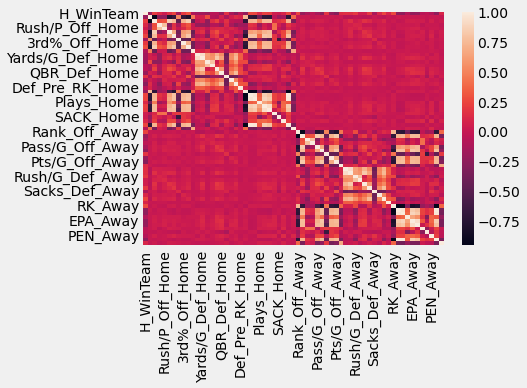

In [46]:
#Plotting the correlation between offense and defense to home wins
off_def_feat = ['H_WinTeam', 'Rank_Off_Home',
       'Yards/G_Off_Home', 'Rush/G_Off_Home', 'Rush/P_Off_Home',
       'Pass/G_Off_Home', 'QBR_Off_Home', 'Sacks_Off_Home', '3rd%_Off_Home',
       'Poss/G_Off_Home', 'Pts/G_Off_Home', 'Off_Pre_RK_Home', 'Rank_Def_Home',
       'Yards/G_Def_Home', 'Rush/G_Def_Home', 'Rush/P_Def_Home',
       'Pass/G_Def_Home', 'QBR_Def_Home', 'Sacks_Def_Home', '3rd%_Def_Home',
       'Poss/G_Def_Home', 'Pts/G_Def_Home', 'Def_Pre_RK_Home', 'RK_Home',
       'QBR_Home', 'PAA_Home', 'Plays_Home', 'EPA_Home', 'PASS_Home',
       'RUN_Home', 'SACK_Home', 'PEN_Home', 'RAW_Home', 'QBName_Home',
       'QB_Pre_RK_Home', 'Rank_Off_Away',
       'Yards/G_Off_Away', 'Rush/G_Off_Away', 'Rush/P_Off_Away',
       'Pass/G_Off_Away', 'QBR_Off_Away', 'Sacks_Off_Away', '3rd%_Off_Away',
       'Poss/G_Off_Away', 'Pts/G_Off_Away', 'Off_Pre_RK_Away', 'Rank_Def_Away',
       'Yards/G_Def_Away', 'Rush/G_Def_Away', 'Rush/P_Def_Away',
       'Pass/G_Def_Away', 'QBR_Def_Away', 'Sacks_Def_Away', '3rd%_Def_Away',
       'Poss/G_Def_Away', 'Pts/G_Def_Away', 'Def_Pre_RK_Away', 'RK_Away',
       'QBR_Away', 'PAA_Away', 'Plays_Away', 'EPA_Away', 'PASS_Away',
       'RUN_Away', 'SACK_Away', 'PEN_Away', 'RAW_Away', 'QBName_Away',
       'QB_Pre_RK_Away']
off_def_df = nfl[off_def_feat]
off_def_corr = off_def_df.corr()['H_WinTeam'][1:]
print(off_def_corr.sort_values(ascending=False).head(20))
sns.heatmap(off_def_df.corr())



The feature that have the highest correlation are: Pts/G_Off (offense points per game), QBR (quarterback rating, adjusting for defense faced), RAW (raw total quarterback rating, NOT adjusting for defense faced), PAA (points contributed by quarter back), QBR_Off (Offense data sheet rating the quarter back), EPA (Expected Points Added, difference between a teams expected points at the end and start of a play, it assigns a point value for each individual play), Yards/G (Offense yards per game), PASS (expected points added on pass attempts), 3rd%_Off (offensive third down percent) and Sacks_Def (number of quarterback tackles behind the line of scrimmage before the ball is thrown).



In [47]:
#Analyzing Offense Stats
off_headers_away = ['Season', 'H_WinTeam', 'Rank_Off_Away',
               'Yards/G_Off_Away', 'Rush/G_Off_Away', 'Rush/P_Off_Away',
               'Pass/G_Off_Away', 'QBR_Off_Away', 'Sacks_Off_Away', '3rd%_Off_Away',
               'Poss/G_Off_Away', 'Pts/G_Off_Away', 'Off_Pre_RK_Away']

off_headers_home = ['Season', 'H_WinTeam', 'Rank_Off_Home',
               'Yards/G_Off_Home', 'Rush/G_Off_Home', 'Rush/P_Off_Home',
               'Pass/G_Off_Home', 'QBR_Off_Home', 'Sacks_Off_Home', '3rd%_Off_Home',
               'Poss/G_Off_Home', 'Pts/G_Off_Home', 'Off_Pre_RK_Home']

#Make a table of just the win offense - Away
off_away_win = nfl[off_headers_away][nfl['H_WinTeam']==0]
off_away_win = off_away_win.rename({'H_WinTeam':'H_Win', 'Rank_Off_Away':'Rank_Off', 
                           'Yards/G_Off_Away':'Yards/G_Off', 'Rush/G_Off_Away':'Rush/G_Off',
                            'Rush/P_Off_Away':'Rush/P_Off', 'Pass/G_Off_Away':'Pass/G_Off',
                            'QBR_Off_Away':'QBR_Off', 'Sacks_Off_Away':'Sacks_Off',
                            '3rd%_Off_Away':'3rd%_Off', 'Poss/G_Off_Away':'Poss/G_Off',
                            'Pts/G_Off_Away':'Pts/G_Off', 'Off_Pre_RK_Away':'Off_Pre_RK'},axis=1)
#print(off_away_win.head())

#Make a table of just the win offense - Home
off_home_win = nfl[off_headers_home][nfl['H_WinTeam']==1]
off_home_win = off_home_win.rename({'H_WinTeam':'H_Win', 'Rank_Off_Home':'Rank_Off', 
                    'Yards/G_Off_Home':'Yards/G_Off', 'Rush/G_Off_Home':'Rush/G_Off',
                    'Rush/P_Off_Home':'Rush/P_Off', 'Pass/G_Off_Home':'Pass/G_Off',
                    'QBR_Off_Home':'QBR_Off', 'Sacks_Off_Home':'Sacks_Off',
                    '3rd%_Off_Home':'3rd%_Off', 'Poss/G_Off_Home':'Poss/G_Off',
                    'Pts/G_Off_Home':'Pts/G_Off', 'Off_Pre_RK_Home':'Off_Pre_RK'},axis=1)
#print(off_home_win.head())

#combinning both files to make the data easier to plot and analyze
off_stats_win = pd.concat([off_home_win, off_away_win], axis=0)
#The number of rows matches the full data frame 'nfl'
print(off_stats_win.head())
print(off_stats_win.shape)
#print(out_conf_stat.head())

   Season  H_Win  Rank_Off  Yards/G_Off  Rush/G_Off  Rush/P_Off  Pass/G_Off  \
0    2021    1.0         9        372.1        99.0         4.0       273.1   
2    2021    1.0         3        396.8       115.0         4.5       281.8   
6    2021    1.0         9        372.1        99.0         4.0       273.1   
7    2021    1.0         3        396.8       115.0         4.5       281.8   
9    2021    1.0         2        405.9        98.4         4.3       307.6   

   QBR_Off  Sacks_Off  3rd%_Off Poss/G_Off  Pts/G_Off  Off_Pre_RK  
0    101.6         31      43.9   29:03:00       27.1        11.0  
2     98.1         28      52.2   30:57:00       28.2         1.0  
6    101.6         31      43.9   29:03:00       27.1        11.0  
7     98.1         28      52.2   30:57:00       28.2         1.0  
9    101.6         23      47.1   30:28:00       30.1         7.0  
(3999, 13)


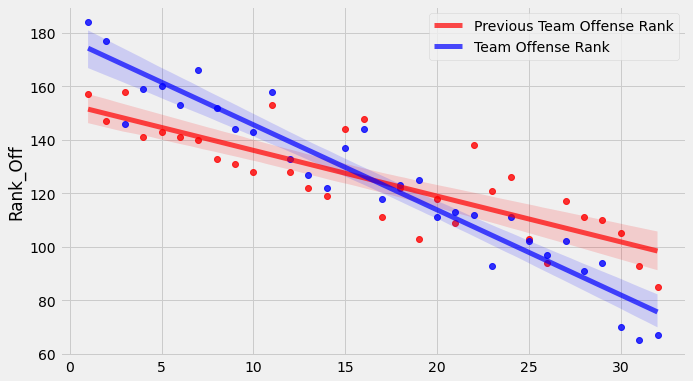

In [48]:
#out_div_stats['Div'].groupby(out_div_stats['Season']).value_counts().unstack()['NFC East']

fig = plt.figure(figsize=(10,6))
sns.regplot(x=off_stats_win['Off_Pre_RK'].value_counts().index, 
            y=off_stats_win['Off_Pre_RK'].value_counts(),
           line_kws={"color":"r","alpha":0.7,"lw":5, "label":"Previous Team Offense Rank"},
           #label='Previous Team Offense Rank',
           scatter_kws={"color": "red"})
sns.regplot(x=off_stats_win['Rank_Off'].value_counts().index, 
            y=off_stats_win['Rank_Off'].value_counts(),
           line_kws={"color":"b","alpha":0.7,"lw":5, "label":"Team Offense Rank"},
           #label='Team Offense Rank',
           scatter_kws={"color": "blue"})

#plt.legend(['High Home Win %', 'Low Home Win %','', 
#            'Low Home Win %','High Home Win %', 'Low Home Win %'])
#fig.legend(labels=['Previous Season Offense Rank', 'Team Offense Rank'])
plt.legend()
plt.show()

In [49]:
off_stats_win['Yards/G_Off'].value_counts()

372.1    39
363.8    31
415.8    29
379.2    28
363.1    28
         ..
279.9     2
299.0     2
292.0     2
311.0     1
279.4     1
Name: Yards/G_Off, Length: 397, dtype: int64

In [50]:
#Yards/G_Off_Home

nfl['delta_Yards/G_Off'] = nfl.apply(lambda x: x['Yards/G_Off_Home']-x['Yards/G_Off_Away'] if x['H_WinTeam']==1
                             else x['Yards/G_Off_Away'] - x['Yards/G_Off_Home'], axis=1)

print(nfl['Yards/G_Off_Home'].head())
print(nfl['Yards/G_Off_Away'].head())
print(nfl['delta_Yards/G_Off'].head())

0    372.1
1    396.8
2    396.8
3    405.9
4    365.6
Name: Yards/G_Off_Home, dtype: float64
0    375.7
1    361.5
2    381.9
3    372.1
4    375.7
Name: Yards/G_Off_Away, dtype: float64
0    -3.6
1   -35.3
2    14.9
3   -33.8
4    10.1
Name: delta_Yards/G_Off, dtype: float64


In [51]:
off_headers = ['Season', 'H_WinTeam', 'Rank_Off_Away',
               'Yards/G_Off_Away', 'Rush/G_Off_Away', 'Rush/P_Off_Away',
               'Pass/G_Off_Away', 'Sacks_Off_Away', '3rd%_Off_Away',
               'Poss/G_Off_Away', 'Pts/G_Off_Away', 'Off_Pre_RK_Away', 'Rank_Off_Home',
               'Yards/G_Off_Home', 'Rush/G_Off_Home', 'Rush/P_Off_Home',
               'Pass/G_Off_Home', 'Sacks_Off_Home', '3rd%_Off_Home',
               'Poss/G_Off_Home', 'Pts/G_Off_Home', 'Off_Pre_RK_Home']

off_df = nfl[off_headers]
off_df.dtypes
#print(off_df['Poss/G_Off_Away'])

#leaving off Poss/G, which it total time of possession per game
#with more time would include this in analysis

off_features = ['Rank_Off', 'Yards/G_Off', 'Rush/G_Off', 'Rush/P_Off', 'Pass/G_Off', 
                'Sacks_Off', '3rd%_Off', 'Pts/G_Off', 'Off_Pre_RK']

for feat in off_features:
    off_df['del_'+feat] = off_df.apply(lambda x: x[feat+'_Home']-x[feat+'_Away'] if x['H_WinTeam']==1 
                                       else x[feat+'_Away'] - x[feat+'_Home'], axis=1)




/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1520/2418912529.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_df['del_'+feat] = off_df.apply(lambda x: x[feat+'_Home']-x[feat+'_Away'] if x['H_WinTeam']==1
/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1520/2418912529.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_df['del_'+feat] = off_df.apply(lambda x: x[feat+'_Home']-x[feat+'_Away'] if x['H_WinTeam']==1
/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1

In [52]:
off_df['del_Rank_Off'].describe()

count    3999.000000
mean       -3.940485
std        12.442904
min       -31.000000
25%       -13.000000
50%        -5.000000
75%         5.000000
max        31.000000
Name: del_Rank_Off, dtype: float64

In [53]:
# Analyzing the amount of days rest between games for the winning team

#nfl['win_rest_delta'].head()
df_rest = nfl[['win_rest_delta']].copy()
#print(df_rest.head())
df_rest['win_rest_delta_days'] = df_rest['win_rest_delta'].str.split(' ', expand=True)[0]
df_rest = df_rest.dropna()
print(df_rest['win_rest_delta_days'].isna().sum())
df_rest['win_rest_delta_days'] = df_rest['win_rest_delta_days'].astype(str).astype(int)

print(df_rest.sort_values(ascending=False, by=['win_rest_delta_days']).head(5))

#droping the 2 outliers 252 days and 246 days
df_rest = df_rest[df_rest['win_rest_delta_days'] != 252]
df_rest = df_rest[df_rest['win_rest_delta_days'] != 246]


df_rest['win_rest_delta_days'].describe()

0
         win_rest_delta  win_rest_delta_days
1330  252 days 00:00:00                  252
1325  246 days 09:15:00                  246
2405   21 days 02:02:00                   21
2136   21 days 02:04:00                   21
3732   21 days 02:03:00                   21


count    3981.000000
mean       -0.455413
std         3.550969
min       -22.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max        21.000000
Name: win_rest_delta_days, dtype: float64

-0.4554132127606129
3.5505229861703596


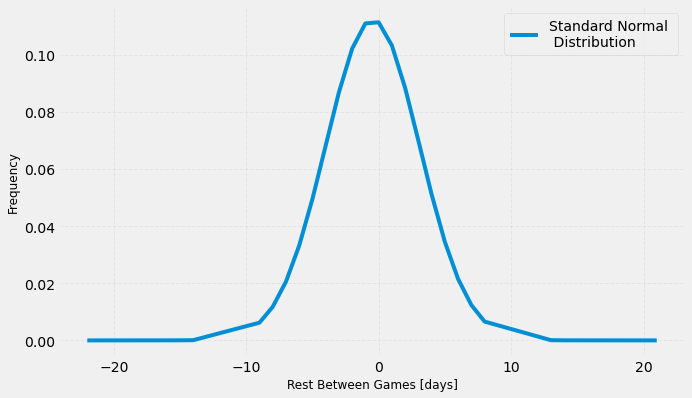

In [54]:
#Hypothesis Testing

#Hypothesis: The rest between games plays a factor on which team will win

#Null Hypothesis: More rest between games team will win (more time to rest and practice plays)
#Alternate Hypothesis: More rest between games team will lose (get lazy)


# Calcualting mean and stadard deviation
mean = np.mean(df_rest['win_rest_delta_days'])
std = np.std(df_rest['win_rest_delta_days'])
print(mean)
print(std)

fig = plt.figure(figsize=(10,6))

# Calculating probability density function (PDF)
pdf = scistats.norm.pdf(df_rest['win_rest_delta_days'].sort_values(), mean, std)

# Drawing a graph
plt.plot(df_rest['win_rest_delta_days'].sort_values(), pdf, label='Standard Normal \n Distribution')
#plt.xlim([-23,23])  
plt.xlabel("Rest Between Games [days]", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
#Add fill -> 68% -> (mean-std) to (mean+std)
#Add fill -> 95% -> (mean-2*std) to (mean+2*std)
#Add fill -> 99% -> (mean-3*std) to (mean+3*std)
plt.legend(loc='upper right')
plt.show()

-0.4554132127606129
3.5505229861703596


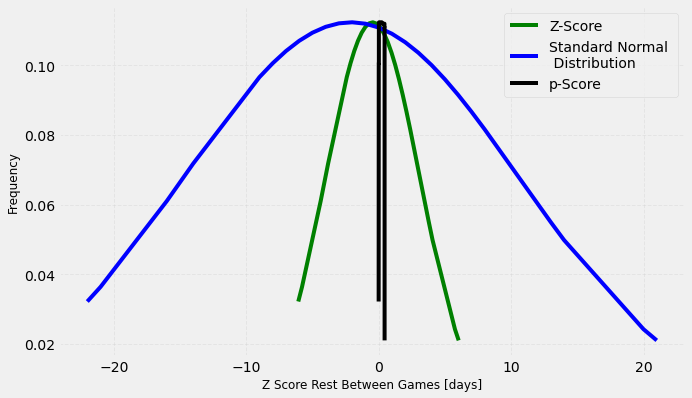

In [55]:
# Calculating z-score

df_rest['z_score_rest_days'] = (df_rest['win_rest_delta_days'] - mean)/std
df_rest['p_score_rest_days'] = scistats.norm.sf(abs(df_rest['z_score_rest_days']))
# Calcualting mean and stadard deviation
z_mean = np.mean(df_rest['win_rest_delta_days'])
z_std = np.std(df_rest['win_rest_delta_days'])
print(mean)
print(std)

fig = plt.figure(figsize=(10,6))

# Calculating probability density function (PDF)
pdf = scistats.norm.pdf(df_rest['z_score_rest_days'].sort_values(), z_mean, z_std)

# Drawing a graph
plt.plot(df_rest['z_score_rest_days'].sort_values(), pdf, color='green', label='Z-Score')
plt.plot(df_rest['win_rest_delta_days'].sort_values(), pdf, color='blue', label='Standard Normal \n Distribution')
plt.plot(df_rest['p_score_rest_days'].sort_values(), pdf, color='black', label='p-Score')

#plt.xlim([-23,23])  
plt.xlabel("Z Score Rest Between Games [days]", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
#Add fill -> 68% -> (mean-std) to (mean+std)
#Add fill -> 95% -> (mean-2*std) to (mean+2*std)
#Add fill -> 99% -> (mean-3*std) to (mean+3*std)
plt.legend(loc='upper right')
plt.show()

In [56]:
# Looking at the p - value

p_value_rest = scistats.norm.sf(abs(df_rest['z_score_rest_days']))

print(p_value_rest.max())
print(p_value_rest.min())
print(p_value_rest.mean())

0.44896903134508354
6.475494206363521e-10
0.34966299373049786
